# LAB 03 Linear Regression

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Simple Linear Regression

  1. MASS에서 Boston Dataset 불러오기  
  2. Boston Dataset에서 medv(median house value)를 종속변수, lstat(percent of households with low socioeconomic status)를 Predictor로 하여 Simple Linear Regression을 수행하고 1) coefficients값 2) 각 coefficients의 유의미 여부 3) R Square 값을 구하라.
  3. lstat 값이 5, 10, 15일 때 각각의 기대값과 기대값의 prediction interval과 confidence interval을 구하라.
  4. 회귀식을 plot으로 표현하라.

## 1

In [2]:
#데이터 불러오기
boston = pd.read_csv('Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.shape

(506, 14)

## 2

In [13]:
import statsmodels.api as sm

In [14]:
# predictor & dependent var
x_train = boston['lstat']
y_true = boston['medv']

In [15]:
# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

C:\Users\dbdms\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        21:08:11   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3

In [17]:
# out of sample predictions
ols_sm_results.predict(sm.add_constant([5, 10, 15]))

array([29.80359411, 25.05334734, 20.30310057])

In [21]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict

y_pred = ols_sm_results.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(ols_sm_results)

pred_dict = OrderedDict({'x_train': x_train,
                         'y_pred': y_pred, 
                         'y_true': y_true, 
                         'lwr': iv_l, 
                         'upr': iv_u, 
                         'pred_se': prstd})

pd.DataFrame(pred_dict).head()

,x_train,y_pred,y_true,lwr,upr,pred_se
1,4.98,29.822595,24.0,17.584603,42.060587,6.228994
2,9.14,25.870390,21.6,13.643413,38.097367,6.223387
3,4.03,30.725142,34.7,18.483488,42.966796,6.230858
4,2.94,31.760696,33.4,19.514315,44.007076,6.233264
5,5.33,29.490078,36.2,17.253328,41.726828,6.228362


## 4

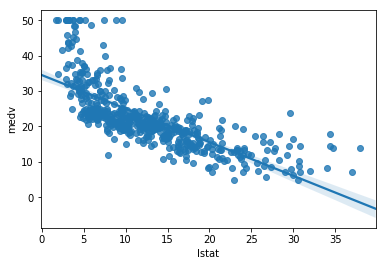

In [20]:
sns.regplot('lstat', 'medv', data=boston)

## 3. Multiple Linear Regression

  1. lstat과 더불어 age변수를 추가하여 Multiple Linear Regression을 수행해서 1) coefficients 값 2) 각 coefficients의 유의미 여부 3) R Square 값을 구하라
  2. car library의 vif 함수를 이용해서 모든 변수의 다중공선성여부를 판단하라.

## 1

In [24]:
x_train = boston[['lstat', 'age']]
y_true = boston['medv']

In [25]:
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           2.98e-88
Time:                        21:14:47   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [27]:
boston_exog = sm.add_constant(boston.drop('medv', axis=1))

for i, col in enumerate(boston_exog.columns):
    if col == 'const':
        pass
    elif len(col) > 6:
        print(col, ':', "{0:.2f}".format(vif(boston_exog.values, i)))
    else:
        print(col, '\t:', "{0:.2f}".format(vif(boston_exog.values, i)))

crim 	: 1.79
zn 	: 2.30
indus 	: 3.99
chas 	: 1.07
nox 	: 4.39
rm 	: 1.93
age 	: 3.10
dis 	: 3.96
rad 	: 7.48
tax 	: 9.01
ptratio : 1.80
black 	: 1.35
lstat 	: 2.94


## 4. Interaction Terms

1. lstat과 age변수의 Interaction Term의 Coefficients값과 계수의 유의미를 판단하라.

In [30]:
import statsmodels.formula.api as smf

In [31]:
ols_smf = smf.ols(formula='medv ~ lstat * age', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           4.86e-88
Time:                        21:18:51   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5. Non-linear Transformation

  1. lstat 변수를 2차원으로 확장해서 linear regression을 수행하라.

In [32]:
ols_smf = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston)

ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          1.56e-112
Time:                        21:20:13   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 6. Qualitative Predictors

  1. ISLR Library 내의 Carseats 데이터에서 Sales를 종속변수로 하고 나머지 변수들을 모두 사용해서 Linear Regression을 수행하라.
  2. Qualitative Predictor인 ShelveLoc이 어떻게 coding으로 구현되었는지 확인. 또는 어떤 Dummy Variable 형태로 변환되었는지 확인.

## 1

In [40]:
carseats = pd.read_csv('Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [41]:
carseats.shape

(400, 11)

In [42]:
carseats_=pd.get_dummies(carseats)

In [43]:
carseats_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 15 columns):
Sales               400 non-null float64
CompPrice           400 non-null int64
Income              400 non-null int64
Advertising         400 non-null int64
Population          400 non-null int64
Price               400 non-null int64
Age                 400 non-null int64
Education           400 non-null int64
ShelveLoc_Bad       400 non-null uint8
ShelveLoc_Good      400 non-null uint8
ShelveLoc_Medium    400 non-null uint8
Urban_No            400 non-null uint8
Urban_Yes           400 non-null uint8
US_No               400 non-null uint8
US_Yes              400 non-null uint8
dtypes: float64(1), int64(7), uint8(7)
memory usage: 30.9 KB


In [45]:
x_train = carseats_.drop(columns=['Sales'])
y_true = carseats_['Sales']

In [46]:
ols_sm_car = sm.OLS(y_true, sm.add_constant(x_train)).fit()
ols_sm_car.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          1.60e-166
Time:                        21:34:01   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3853      0.253     13.370      0.000       2.887       3.883
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Bad       -1.1405      0.118     -9.629      0.000      -1.373      -0.908
ShelveLoc_Good       3.7096      0.121     30.652      0.000       3.472       3.948
ShelveLoc_Medium     0.8162      0.107      7.605      0.000       0.605       1.027
Urban_No             1.6312      0.138     11.789      0.000       1.359       1.903
Urban_Yes            1.7541      0.139     12.629      0.000       1.481       2.027
US_No                1.7847      0.146     12.243      0.000       1.498       2.071
US_Yes               1.6006      0.148     10.783      0.000       1.309       1.892
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 2

In [47]:
original = carseats['ShelveLoc']
change = carseats_[['ShelveLoc_Bad', 'ShelveLoc_Good','ShelveLoc_Medium']]

In [48]:
pd.concat([original, change], axis=1)

,ShelveLoc,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
1,Bad,1,0,0
2,Good,0,1,0
3,Medium,0,0,1
4,Medium,0,0,1
5,Bad,1,0,0
6,Bad,1,0,0
7,Medium,0,0,1
8,Good,0,1,0
9,Medium,0,0,1
10,Medium,0,0,1
